In [3]:
import pandas as pd

"""
Going to consider the column TotalVolume in the displayed dataset to evaluate the Central Limit Theorem
"""
avocado_df = pd.read_csv("C:/Users/Nikitha/OneDrive - sjsu.edu/School/Assignments/Math_Methods_in_DA/datasets/avocado_cleaned_dataset_1.csv")
cnt = avocado_df["TotalVolume"].count()
print("\nCount of values present in the TotalVolume column is:",cnt)
avocado_df.tail()


Count of values present in the TotalVolume column is: 41025


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
41020,11/14/2021,1.851641,2326.92,350.66,5.44,0.00,825.69,702.84,0.00,0.00,Organic,2021,Wichita
41021,11/21/2021,1.004960,80092.30,18981.16,2171.01,9.36,25695.00,22357.24,1902.73,634.68,Conventional,2021,Wichita
41022,11/21/2021,1.869482,2380.46,288.29,2.17,0.00,777.66,708.36,0.00,0.00,Organic,2021,Wichita
41023,11/28/2021,1.008266,70289.47,16251.89,1464.33,6.10,21416.50,18595.17,1656.51,532.21,Conventional,2021,Wichita
41024,11/28/2021,1.866433,2211.57,220.56,18.48,0.00,628.82,581.57,0.00,0.00,Organic,2021,Wichita


In [4]:
import numpy as np

print("\nFollowing are the Population Parameters of the entire dataset:\n")
print("Mean:",avocado_df["TotalVolume"].mean())
print("Median:",avocado_df["TotalVolume"].median())
print("Standard Deviation:",avocado_df["TotalVolume"].std())
q3,q1 = np.percentile(avocado_df['TotalVolume'], [75,25])
print("Q1:",q1)
print("Inter Quartile Range:",q3-q1)
print("\nI have chosen to prove the Central Limit Theorem on MEAN, MEDIAN and STANDARD DEVIATION below")


Following are the Population Parameters of the entire dataset:

Mean: 864294.0129157895
Median: 117447.5
Standard Deviation: 3535860.941404166
Q1: 14888.66
Inter Quartile Range: 430184.38

I have chosen to prove the Central Limit Theorem on MEAN, MEDIAN and STANDARD DEVIATION below


In [5]:
#Converting the TotalVolume Column to a list
totalVolume = avocado_df["TotalVolume"].to_list()

In [6]:
#Generate sample
"""
In this block have defined multiple functions which operate to random samples in any number of batches required.
"""

import statistics
import random

def generateSample(dataList, sampleCount):
    """
    Generating random sample from the list of data provided and the number of samples to be retrieved
    """
    return random.sample(dataList,sampleCount)

def calculateMean(dataList, sampleCount):
    """
    Calculate the Mean of the generated sample list
    Input: List of data and batch size of the sample
    Output: Single value containing the mean of the batch
    """
    sampleList = generateSample(dataList, sampleCount)
    return sum(sampleList)/len(sampleList)

def calculateMedian(dataList, sampleCount):
    """
    Calculate the Median of the generated sample list
    Input: List of data and batch size of the sample
    Output: Single value containing the median of the batch
    """
    sampleList = generateSample(dataList, sampleCount)
    return statistics.median(sampleList)

def calculateStDev(dataList, sampleCount):
    """
    Calculate the standard deviation of the generated sample list
    Input: List of data and batch size of the sample
    Output: Single value containing the stdev of the batch
    """
    sampleList = generateSample(dataList, sampleCount)
    return statistics.pstdev(sampleList)

def listOfParametersGen(parameter,numOfSamples,sampleCount):
    """
    Input:
    parameter is among values mean, median and stDev
    numOfSamples is the number of batches of samples to retrive
    sampleCount is the each batch size
    Output: List of all the parameter values generated based on the sampleCount
    
    """
    meanList=[]
    medianList=[]
    stDevList=[]
    
    if parameter=="mean":
        for i in range(numOfSamples):
            meanList.append(calculateMean(totalVolume,sampleCount))
        return meanList
    elif parameter=="median":
        for i in range(numOfSamples):
            medianList.append(calculateMedian(totalVolume,sampleCount))
        return medianList
    elif parameter=="stDev":
        for i in range(numOfSamples):
            stDevList.append(calculateStDev(totalVolume,sampleCount))
        return stDevList
    else:
        print("Not a valid parameter in this case")
            

In [7]:
#Below is how you call the function:
#parameter="mean"
#Number of Samples = 100
#Number batches with the above number of samples = 500

len(listOfParametersGen("mean",100,500))


100

In [8]:
#Block with code to generate a standard graph for any parameter given
#The call of drawGraph function results in a output of a drawn graph

import seaborn as sns
sns.set_style('whitegrid')

def drawGraph(parameter,SAMPLE_BATCH_SIZE,SAMPLE_BATCHES,colour):
    """
    Keeping the input column constant
    """
    x = listOfParametersGen(parameter,SAMPLE_BATCH_SIZE,SAMPLE_BATCHES)
    df_samples = pd.DataFrame(x, columns=['sample_col'])

    uni_hist_plot = sns.histplot(data=df_samples, x='sample_col',color=colour, bins=10, alpha=0.1, kde=True)
    uni_hist_plot.set_title("Graph of parameter "+parameter)
    uni_hist_plot.set(xlabel=parameter+' of samples',ylabel= 'Frequency')



 Mean of the entire original dataset is: 864294.0129157895


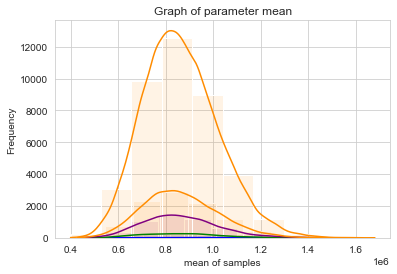

In [9]:
#Keeping the number of sample batches constant and increasing the sample size
#Each graph is indicated by a different color indicating the change in the graph
drawGraph("mean",100,500,"blue")
drawGraph("mean",1000,500,"green")
drawGraph("mean",5000,500,"purple")
drawGraph("mean",10000,500,"darkorange")
drawGraph("mean",40000,500,"darkorange")
print("\n Mean of the entire original dataset is:",avocado_df["TotalVolume"].mean())

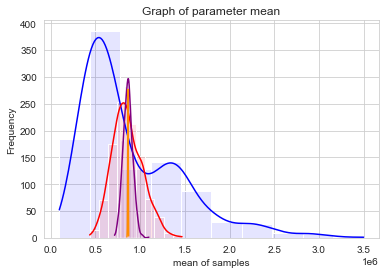

In [10]:
#Keeping the sample size constant and increasing the sample batctes to calculate
drawGraph("mean",1000,40,"blue")
drawGraph("mean",1000,400,"red")
drawGraph("mean",1000,4000,"purple")
drawGraph("mean",1000,40000,"darkorange")


Median of the original dataset calculated is: 117447.5


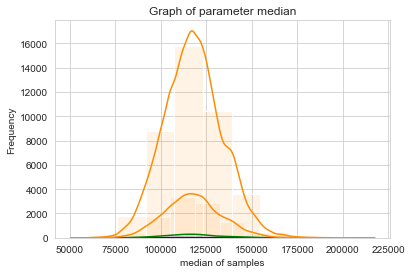

In [11]:
#Keeping the number of sample batches constant and increasing the sample size
drawGraph("median",100,500,"blue")
drawGraph("median",1000,500,"green")
drawGraph("median",10000,500,"darkorange")
drawGraph("median",41000,500,"darkorange")
print("\nMedian of the original dataset calculated is:",avocado_df["TotalVolume"].median())

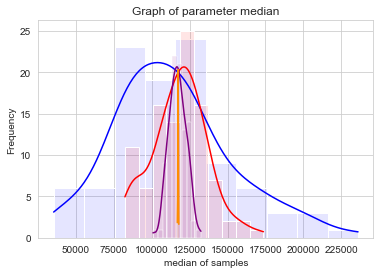

In [12]:
#Keeping the sample size constant and increasing the sample batches to calculate
#Median
drawGraph("median",100,90,"blue")
drawGraph("median",100,400,"red")
drawGraph("median",100,4000,"purple")
drawGraph("median",100,40000,"darkorange")


Standard Deviation of the original dataset calculated is: 3535860.941404166


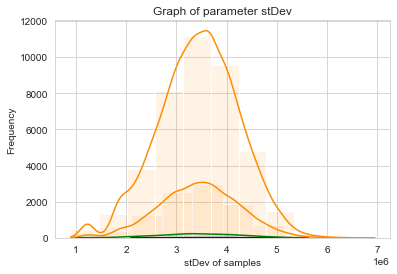

In [13]:
#Keeping the number of sample batches constant and increasing the sample size
#stDev
drawGraph("stDev",100,500,"blue")
drawGraph("stDev",1000,500,"green")
drawGraph("stDev",10000,500,"darkorange")
drawGraph("stDev",41000,500,"darkorange")
print("\nStandard Deviation of the original dataset calculated is:",avocado_df["TotalVolume"].std())

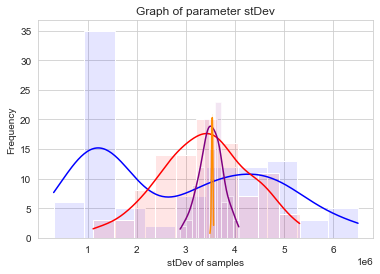

In [14]:
#Keeping the sample size constant and increasing the sample batctes to calculate
#StDev
drawGraph("stDev",100,90,"blue")
drawGraph("stDev",100,400,"red")
drawGraph("stDev",100,4000,"purple")
drawGraph("stDev",100,40000,"darkorange")

### Report:

Mean, Median and Standard Deviation Parameters are taken into consideration for the evaluation.

1. In all the cases as per the Central Limit Theorem the normal distribution curve is formed by showing the frequency distribution of the random sample parameters.
2. With a constant sample collection and with increasing the sample size the curve moves from a flat curve to a normal distribution curve. In case of mean, median and standard deviation it resulted in normal distribution with no deviation until the sample size equal to the total row count.
3. In case of a constant sample size and with increasing sample collection the curve moves from normal distribution to a much sharper curve almost a straight line. When the sample size is very smaller (like 100 or 1000 that is around 1-2% of the total data size) and sample size is less than sample collections count then the graphs are observed to have multiple ups and downs. This is observed in all the 3 parameters
4. It is observed that until a threshold the graph plotted doesnt turn out to be a normal distribution graph
    Eg: If you look at the above graph for a sample size of 100 and sample collections being below 4000 it did not give out a normal distribution graph.
   
   I believe a percentage correlation will exist between
   
   i) total data size VS sample size 
   ii) sample collection count VS total data size
   iii) sample collection count VS sample size
   
   For us to conclude any of it many experiments are required to be done on various types of data to come to a standard observation
   